# Classification 分类 metrics

## confusion_matrix 混淆矩阵
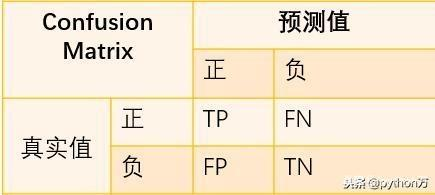

Positive or Negative: 表示预测是真还是假

True or False: 表示预测是否正确

如： True Positive表示预测为真的样本中，真样本的那一部分


* TP(True Positive)：将正类预测为正类数，真实为0，预测也为0
* FN(False Negative)：将正类预测为负类数，真实为0，预测为1
* FP(False Positive)：将负类预测为正类数， 真实为1，预测为0
* TN(True Negative)：将负类预测为负类数，真实为1，预测也为1

In [22]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

array([[2, 0],
       [1, 2]])

In [29]:
confusion_matrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1]).ravel()

array([2, 0, 1, 2])

In [30]:
tp, fn, fp, tn = confusion_matrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1]).ravel()

In [32]:
tp, fn, fp, tn

(2, 1, 0, 2)

In [27]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [28]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### PlotConfusionMatrix

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud):

    cfn_matrix = confusion_matrix(y_test,pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

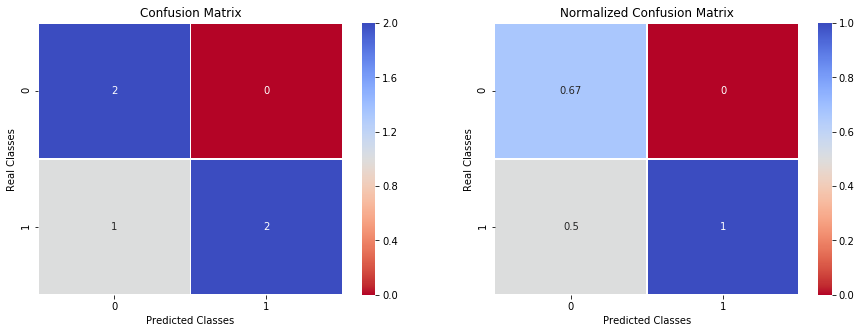

---Classification Report---
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

   micro avg       0.80      0.80      0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [26]:
PlotConfusionMatrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1], 3, 2)

## accuracy_score & balanced_accuracy_score

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.8

5个有1个分错：
accuracy_score = 4/5 = 0.8

In [1]:
from sklearn.metrics import balanced_accuracy_score

In [2]:
balanced_accuracy_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.8333333333333333

分类为0的样本里面有0个分错：

s2 = 1

分类为1的样本里面有1个分错：

s1 = 2/3

balanced_accuracy_score = (1 + 2/3)/2 = 5/6 = 0.8333333333333333

## precision_score
y_pred中预测为1中样本中，实际为1的比例

In [11]:
from sklearn.metrics import precision_score

In [13]:
precision_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

1.0

### precision_n_scores
使用场景：预测值为评分。把预测得分中的前n个置为1，计算precision score

In [14]:
from pyod.utils.utility import precision_n_scores,  get_label_n

In [15]:
y = [0, 1, 1, 0, 1]
y_pred = [0.1, 0.5, 0.3, 0.2, 0.7]

In [16]:
# 把分数高的前n个值置为1， 默认n为y中1的数量
get_label_n(y, y_pred)

array([0, 1, 1, 0, 1])

In [17]:
precision_n_scores(y, y_pred)

1.0

等价于

In [7]:
precision_score(y, get_label_n(y, y_pred))

1.0

In [8]:
precision_score(y, get_label_n(y, y_pred, 2))

1.0

## recall_score

In [18]:
from sklearn.metrics import recall_score

In [19]:
recall_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.6666666666666666

## f1_score
F1 = 2 * (precision * recall) / (precision + recall)

In [1]:
from sklearn.metrics import f1_score

In [2]:
f1_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.8

### fbeta_score
F1-Score，这时召回率和精确率都很重要，权重相同。当有些情况下我们认为精确率更为重要，那就调整 β 的值小于 1 ，如果我们认为召回率更加重要，那就调整 β的值大于1，比如F2-Score。

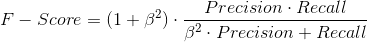

In [22]:
from sklearn.metrics import fbeta_score

In [23]:
fbeta_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1], 1)

0.8

In [24]:
fbeta_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1], 2)

0.7142857142857142

## classification_report

In [1]:
from sklearn.metrics import classification_report

In [4]:
print(classification_report([0, 1, 1, 0, 1], [0, 1, 0, 0, 1]))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

   micro avg       0.80      0.80      0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



## precision_recall_curve

precision=TP/(TP+FP)  

recall=TP/(TP+FN)

In [3]:
from sklearn.metrics import precision_recall_curve

In [18]:
precision, recall, thresholds = precision_recall_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.6, 0.8])
precision, recall, thresholds

(array([0.75      , 0.66666667, 1.        , 1.        , 1.        ]),
 array([1.        , 0.66666667, 0.66666667, 0.33333333, 0.        ]),
 array([0.5, 0.6, 0.7, 0.8]))

解释：
1. 当阈值>=0.1时，precision=0.75， recall=1
1. 当阈值>=0.5时，precision=0.75， recall=1
1. 当阈值>=0.6时，precision=0.66666667， recall=0.66666667
1. 当阈值>=0.7时，precision=1， recall=0.66666667
1. 当阈值>=0.8时，precision=1， recall=0.33333333
1. 当阈值接近1时，注意__precision=1__， recall=0

绘制precision_recall_curve流程，横轴recall， 纵轴precision。阈值从1到0移动。

一般情况下，阈值越大，precision越高（接近1），recall值越低（接近0）；

阈值越低， precision越低（接近全部真样本占总样本的比例), recall越高（接近1）

当阈值接近1时，全部预测为Negtive，此时recall=0， precision=1（注意：这里按公式时0，因为TP=0；置为1是合乎常理，保持连续！）

当阈值接近0时，全部预测为Positive，此时recall=1， precision=真样本占总样本的比例

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_precision_recall_curve(y_test,pred_prob):
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlim([-0.05,1.05])
    ax1.set_ylim([-0.05,1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    p,r,_ = precision_recall_curve(y_test,pred_prob)
    
    ax1.plot(r,p,c='b',label='prc')
    ax1.legend(loc='lower left')    

    plt.show()

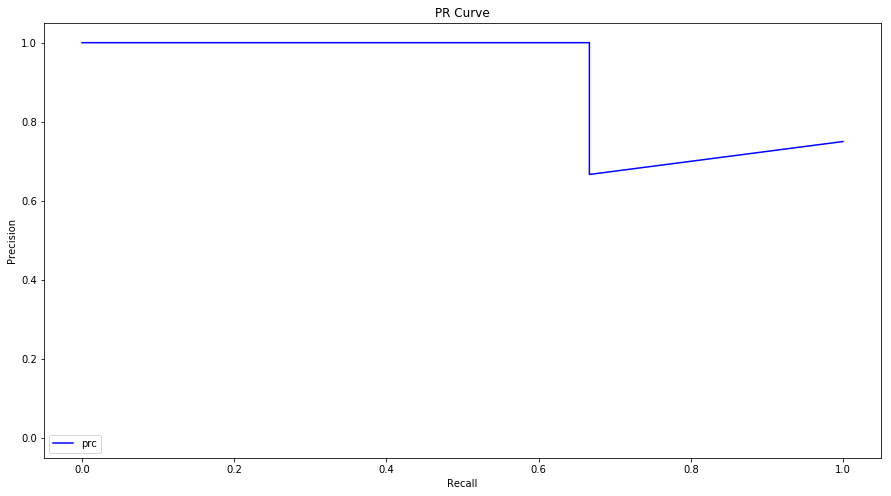

In [10]:
draw_precision_recall_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.6, 0.8])

### AP average_precision_score
Compute average precision (AP) from prediction scores

$$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$$

AP summarizes a precision-recall curve as the weighted mean of precisions
achieved at each threshold, with the increase in recall from the previous
threshold used as the weight:

In [1]:
from sklearn.metrics import average_precision_score

In [21]:
precision, recall, thresholds = precision_recall_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.9, 0.8])
precision, recall, thresholds

(array([0.75      , 0.66666667, 0.5       , 0.        , 1.        ]),
 array([1.        , 0.66666667, 0.33333333, 0.        , 0.        ]),
 array([0.5, 0.7, 0.8, 0.9]))

In [22]:
import pandas as pd

/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
p = pd.Series(precision)

In [26]:
p.shift(-1).fillna(0)

0    0.666667
1    0.500000
2    0.000000
3    1.000000
4    0.000000
dtype: float64

In [27]:
def cal_AP(p, r):
    r = pd.Series(r)
    return (pd.Series(p)*(r-r.shift(-1).fillna(0))).sum()

In [28]:
cal_AP(precision, recall)

0.6388888888888888

In [29]:
average_precision_score([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.9, 0.8])

0.6388888888888888

## ROC & AUC 二分类

AUC（Area Under Curve）的值为ROC曲线下面的面积，若如上所述模型十分准确，则AUC为1。但现实工作中不会有如此完美的模型，**一般AUC均在0.5到1之间，AUC越高，模型的区分能力越好**，上图AUC为0.81。若AUC=0.5，即与上图中红线重合，表示模型的区分能力不随机猜测没有差别。若AUC真的小于0.5，表明模型很差。

* TPR  （True positive rate）
TPR = TP / (TP+FN)  正类样本召回率，表示当前分到正样本中真实的正样本所占所有正样本的比例；
* FPR  （False positive rate）
FPR = FP / (FP + TN)  负类样本召回率，表示当前被错误分到正样本类别中真实的负样本所占所有负样本总数的比例

随着阈值(0,1)的变化，当阈值极限接近0时，全部样本都被判断为Positive, 那么TPR=1；FPR=1

当阈值极限接近1时，全部样本都被判断为Negtive, 那么TPR=0；FPR=0

### 举例：画ROC曲线
10个正类，10个负类；按照预测的样本的概率值score降序排列。如下图有20个样本：Inst#表示样本编号，Class表示样本实际的分类（p表示实际为真，n表示实际为假），Score表示样本被模型预测为真的概率。

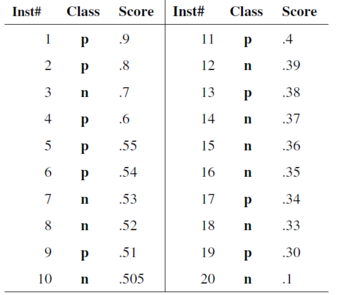

绘制ROC曲线的过程：
* 以第一个样本的预测Score为阈值，即把预测概率≥0.9的样本预测为真，＜0.9的样本预测为假，那么在这种情况下，TPR为0.1（10个真实的正样本只预测出1个）；如果把预测概率≥0.9的样本预测为假，＜0.9的样本预测为真，那么在这种情况下，FPR为0（10个真实的假样本只预测出0个）。所以此时确定的ROC中的坐标点为（0,0.1）
* 继续第二个样本的预测Score为阈值。得到坐标点（0,0.2）
* 依次类推，ROC曲线就绘制出来了。如下图所示。

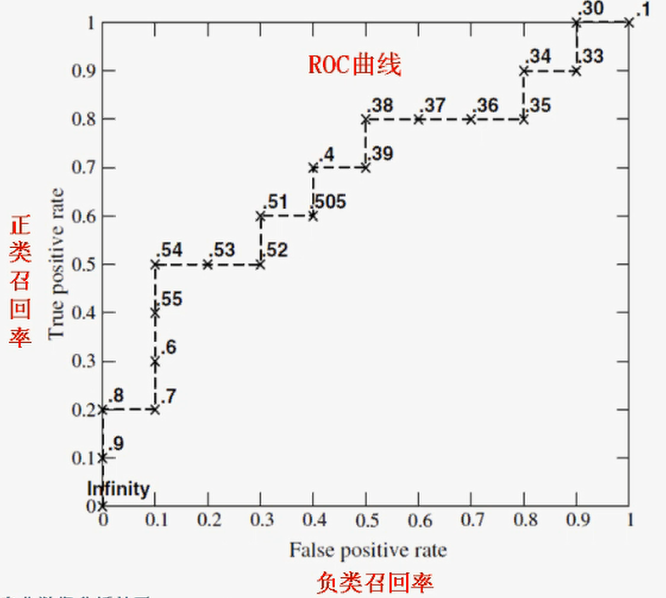

### ROC接近45°对角线说明什么？
假设正样本20个，负样本10个。ROC接近45°，意味着随着阈值由1向0变化，在预测为正的样本中，每增加2个TP, 就会再增加1个FP, 模型的性能和掷硬币没什么区别。

模型最好的情况是ROC曲线下方围成的面积为1!!!

### 如何确定最终阈值改选在哪
应该TPR足够大，而FPR足够小，即TPR和FPR相差最大的地方。如何衡量？可以选TPR-FPR最大时对应的阈值，或者，TPR/FPR最大时对应的阈值！

### 计算AUC

In [1]:
from sklearn.metrics import roc_auc_score

In [2]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

### AUC多分类

In [ ]:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',  # multiclass ROC AUC currently only handles the 'macro' and
                        # 'weighted' averages.
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
 
y_label = np.array([
[1, 0, 0], [1, 0, 0], [1, 0, 0],
[0, 1, 0], [0,  1, 0], [0, 1, 0],
[0, 0, 1], [0, 0, 1], [0, 0, 1]
])
 
y_score = np.array([
[0.8, 0.1, 0.1], [0.2, 0.32, 0.48], [0.6, 0.1, 0.3],
[0.2, 0.5, 0.3], [0.1, 0.6, 0.3], [0.2, 0.75, 0.05],
[0.05, 0.05, 0.9], [0.1, 0.3, 0.6], [0.12, 0.8, 0.08],
])

n_classes = 3

In [14]:
roc_auc_score(y_label, y_score, average='macro')

0.8333333333333334

In [9]:
roc_auc_score(y_label, y_score, average='micro')

0.8240740740740741

In [6]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
# micro（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
# macro（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


In [11]:
roc_auc["micro"], roc_auc["macro"]

(0.8240740740740741, 0.8703703703703703)

### roc_curve

In [2]:
from sklearn.metrics import roc_curve

In [31]:
fpr, tpr, thresholds = roc_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.9, 0.8])
fpr, tpr, thresholds

(array([0. , 0.5, 0.5, 1. ]),
 array([0., 0., 1., 1.]),
 array([1.9, 0.9, 0.5, 0.1]))

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_prc_roc(y_test,pred_prob):
    from sklearn.metrics import precision_recall_curve
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.05,1.05])
    ax1.set_ylim([-0.05,1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.05,1.05])
    ax2.set_ylim([-0.05,1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

#     for w,k in zip([1,5,10,20,50,100,10000],'bgrcmykw'):
#         lr_model = LogisticRegression(class_weight={0:1,1:w})
#         lr_model.fit(x_train,y_train)
#         pred_prob = lr_model.predict_proba(x_test)[:,1]

#         p,r,_ = precision_recall_curve(y_test,pred_prob)
#         tpr,fpr,_ = roc_curve(y_test,pred_prob)

#         ax1.plot(r,p,c=k,label=w)
#         ax2.plot(tpr,fpr,c=k,label=w)
    p,r,_ = precision_recall_curve(y_test,pred_prob)
    tpr,fpr,_ = roc_curve(y_test,pred_prob)

    ax1.plot(r,p,c='b',label='prc')
    ax2.plot(tpr,fpr,c='b',label='roc')
    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')

    plt.show()

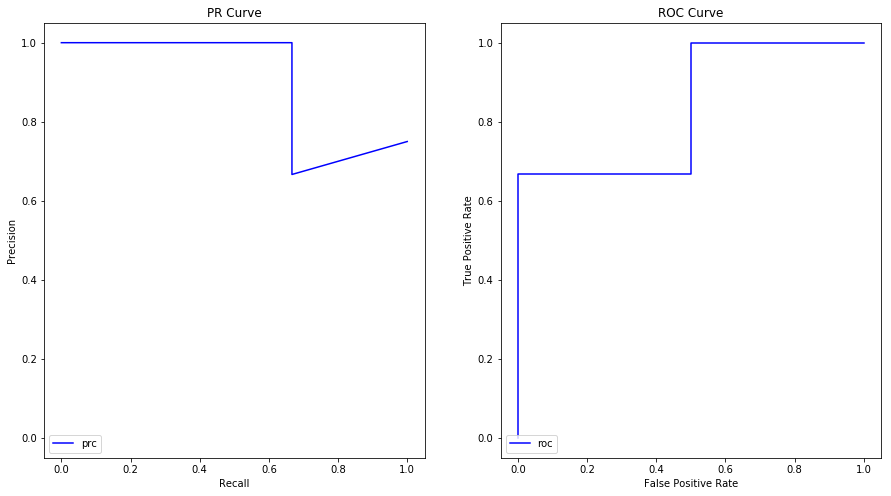

In [30]:
draw_prc_roc([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.6, 0.8])

## KS曲线与KS值
https://blog.csdn.net/Orange_Spotty_Cat/article/details/82016928

KS曲线是用来衡量分类型模型准确度的工具。KS曲线与ROC曲线非常的类似。其指标的计算方法与混淆矩阵、ROC基本一致。

它只是用另一种方式呈现分类模型的准确性。KS值是KS图中两条线之间最大的距离，其能反映出分类器的划分能力。

一句话概括版本：

KS曲线是两条线，其横轴是阈值，纵轴是TPR与FPR。两条曲线之间之间相距最远的地方对应的阈值，就是最能划分模型的阈值。

KS值是MAX(TPR - FPR），即两曲线相距最远的距离。


### 计算

In [3]:
fpr,tpr,thresholds= roc_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.9, 0.8])
print ('KS:',max(tpr-fpr))

KS: 0.5


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_test = pd.DataFrame({'score': [0.1, 0.7, 0.5, 0.9, 0.8], 'target': [0, 1, 1, 0, 1]})

0.5

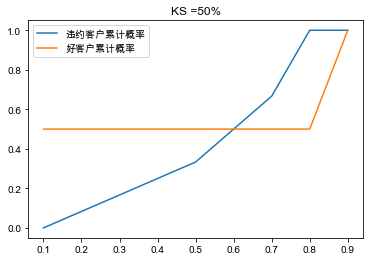

In [9]:
# 以下函数是用来画KS图的
def KS(df, score, target, plot = True):
    '''
    :param df: 包含目标变量与预测值的数据集
    :param score: 得分或者概率
    :param target: 目标变量
    :return: KS值
    :return: KS值
    '''
    total = df.groupby([score])[target].count()
    bad = df.groupby([score])[target].sum()
    all = pd.DataFrame({'total':total, 'bad':bad})
    all['good'] = all['total'] - all['bad']
    all['score'] = all.index
    all.index = range(len(all))
    all = all.sort_values(by='score',ascending=True)
    all['badCumRate'] = all['bad'].cumsum() / all['bad'].sum()
    all['goodCumRate'] = all['good'].cumsum() / all['good'].sum()
    KS_list = all.apply(lambda x: x.badCumRate - x.goodCumRate, axis=1)
    KS = max(abs(KS_list))
    if plot:
        # 支持中文显示
        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
        plt.rcParams['axes.unicode_minus'] = False
        plt.plot(all[score], all['badCumRate'],label='违约客户累计概率')
        plt.plot(all[score], all['goodCumRate'],label='好客户累计概率')
        plt.title('KS ={}%'.format(int(KS*100)))
        plt.legend()
    return KS
# 画KS图
KS(df_test, 'score', 'target', plot = True)

# 回归 metrics

## mse：mean_squared_error 均方误差

### mse计算

In [10]:
import numpy as np

In [9]:
y_true, y_pred = [3, -0.5, 2, 7], [2.5, 0.0, 2, 8]

In [14]:
np.mean(np.square(np.array(y_true) - np.array(y_pred)))

0.375

In [4]:
from sklearn.metrics import mean_squared_error as mse

In [5]:
y_true, y_pred = [3, -0.5, 2, 7], [2.5, 0.0, 2, 8]
print(mse(y_true, y_pred))

0.375


## R2 决定系数（拟合优度）
决定系数（coefficient ofdetermination），有的教材上翻译为判定系数，也称为拟合优度。  
https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination  
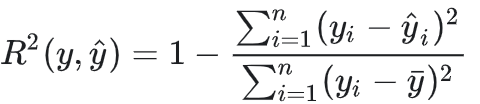

yi代表真实值， y^代表预测值。    

从公式中，可以很容易看出：  
R2是把__预测值和真实值的误差平方和__和__真实值的方差__做比较！

* 模型越好：r2→1
* 模型越差：r2→0
* 一个模型的R2 值为0还不如直接用平均值来预测效果好；而一个R2值为1的模型则可以对目标变量进行完美的预测。
* 从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用特征来解释。
* 模型也可能出现负值的R2，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。

In [41]:
def cal_r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_true)
    return 1 - np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true-y_mean))

In [42]:
cal_r2_score(y_true, y_pred)

0.9486081370449679

In [1]:
from sklearn.metrics import r2_score

In [2]:
y_true, y_pred = [3, -0.5, 2, 7], [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred))

0.9486081370449679


# 推荐系统/信息检索information retrieval中常用的评估指标
http://www.thefullwiki.org/Mean_average_precision

https://blog.csdn.net/weixin_40446557/article/details/83106995

假设所有商品数目为大U，搜索A时，希望检索出的结果为a1, a2, ..., a_m。如何来平均算法的性能呢？

U: 测试集样本总数

m_u: 第u个样本正确的检索数

n_u: 第u个样本算法预测的检索数

P(k): 前k个预测中正确预测的产品数/k.

如P(5)表示预测的前5个产品中正确预测的个数，假设预测对两个，则P(5)=0.4



## MAP@N(Mean Average Precision @N)
N: 正整数。计算前N个预测结果的正确率

$$MAP@N=\frac{1}{U}\sum^U_{u=1}[\frac{1}{min(m_u, N)}\sum^{min(n_u, N)}_{k=1}P(k)]$$

从上式的最后一项可以看出，算法预测数n=N是最有利的，n>N时的效果和n=N相同。

假设第u个样本正确检索数m=4(分别为a,b,c,d), 算法预测数是7(分别为a,e,f,c,d,g,h)

那么

P(1)=1, P(2)=0.5, P(3)=1/3, P(4)=0.5, P(5)=0.6, p(6)=0.5, P(7)=3/7

假设N=1, 则方括号内值为1

N=4, 则方括号内值为(P(1)+P(2)+P(3)+P(4))/4   # 还蛮合理

N=7, 则方括号内值为(P(1)+P(2)+P(3)+P(4)+P(5)+P(6)+P(7))/4  # 明显预测多一点占便宜啊

N=10, 则方括号内值为(P(1)+P(2)+P(3)+P(4)+P(5)+P(6)+P(7))/4  # 结果和N=7相同

